# Que buscamos:
 ---
  - Lo que buscamos es encontrar algún (o algunos) modelos que nos permitan aproximar alguna de las columnas del dataset (si, alguna).
  - Si o si tenemos que hacerlo co nla columna "precio", pero además tenemos que elgir otra (está en el enunciado).
    
  - Separemos los tantos:
       - Feature Engeniere es algo que vamos a hacer POR FUERA de todo lo que es la ejecución, es decir, cuando nosotros hagamos fit + predict + loquesea, esta nueva columna no tiene idea de que es nueva, asi que esto no nos importa tanto (para lo que es la ejecucion pura y dura)
       
       - Segmentación + K-fold + errores, es algo que nos interesa DENTRO de la ejecución.
       - Ejecutar 1 vez y tomar metricas, no estaría bueno, por lo que ya sabemos (overfitting), entonces no nos queda otra más que para cada segmento, realizar el KFold, callcular las métricas en cada Fold, y guardar el promedio de esas métricas (nos queda un array de metricas promedio en cada segmento).
       - ¿Donde empieza el prolema? En que para cada Fold, los valores de los factores de la ecuación de la recta (esos que obtenemos cuando hacemos fit) van a cambiar siempre, porque para cada "cacho" de dataset, estas cambian.
       - ¿Nos importa realmente? Obviamente googlie esto porque estaba medio perdido, y la respuesta es que no (a priori). Lo primero que a nosotros nos interesa saber, es si nuestro modelo "esta bueno", es decir, si el error total es bajo (comparando distintas métricas y demas). Esto no nos da las variables "finales", una vez que definimos que algún modelo funciona bien, recién ahí ejecutamos la regresión con TODOS los datos, y no quedamos con los factores resultantes (si usamos segmentación, seria un conjunto de factores para cada segmento, y para predecír deberíamos saber determinar a que segmento pertenece)

In [33]:
import metnum
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from Model import Model
from Segment import Segment

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_original = pd.read_csv('../data/train.csv')
df = df_original.copy()

# Analisis de Datos
---------------------------------------------------------------------------------------
- Queremos predecir el algúna de las características de una inmueble en funcion de otras. A priori no sabemos cuales de estas características son las más representativas, ni en el conjunto de datos, ni para cualquier vivienda en particular.
- Podemos dividir a nuestras variables en 2 tipos, de tipo **numericas** y de tipo **categoricas**
- Analisemos primero las categóricas, ¿Que relación existe entre ellas?. Para cuantificar esta relación, vamos a crear una matriz de correlación. Lo que nos interesa es, entre cada par de datos, medir el coeficiente de Pearson, el cual nos permite comparar un par de variables independientemente de la escala en la que cada una se encuentre. Dado que nos interesa saber si dos variables se relacionan tanto de manera positiva como negativa, vamos a tomar el cuadrao de el coeficiente de Pearson (es la métrica conocida como R2 Score o coeficiente de determinación). Para visualizar de manera mas "amigable" estos datos, vamos a utilizar un mapa de calor.

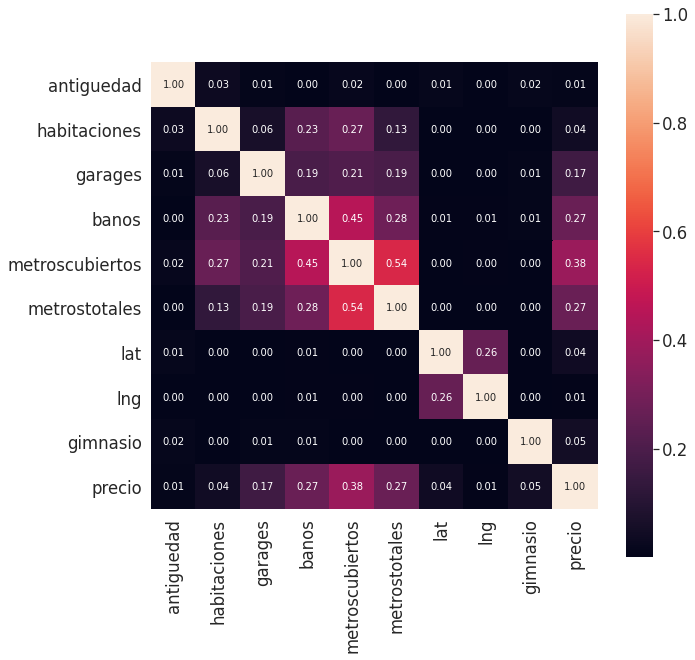

In [42]:
numeric_values = ['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'lat', 'lng', 'gimnasio', 'precio']
cm = np.corrcoef(df[numeric_values].dropna().values.T) **2
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=numeric_values,
                xticklabels=numeric_values,
                ax=ax)

En el conjunto de datos utilizado existen características con valores no definidos (por ejemplo hay datos que no tienen la cantidad de baños que poseen, o no indican su antiguedad), por lo que solo tomamos el subconjunto que contenga todas las características numéricas que queremos comparar.

De manera muy rápida podemos notar que la mayoría de los datos no tienen relación entre si, lo cual tiene bastante sentido si nos lo ponemos a pensar, el hecho de que una casa tenga o no gimnasio, no nos dice nada respecto de si tiene o no piscina, o de la latitud y longitud en la que se encuentra.
Retomaremos más adelante a aquellas variables que se encuentran más relacionadas.


### Variables categoricas

Miremos un poco las variables categóricas, ¿como nos pueden ayudar en nuestra predicción?. Para contestar esta pregunta primero pensemos, ¿tiene sentido que todas las viviendas, en todo el país, tengan la misma forma de tasación?. Sabemos que en la tasaciones de inmuebles los factores de zona geografica, entre otros, se relacionan directamente con el precio final de la casa, por ejemplo no es lo mismo un inmueble con muchos metros cuadrados en una zona suburbana que en una zona rural.

Tiene sentido entonces, hablar de una **regresión segmentada**, en donde un segmento será un subconjunto de datos que corresponda a algúna de las categorias de una variable segmentada. Por ejemplo, podemos tomar subconjuntos correspondientes a los datos de cada provincia.

__________________________________________________________________________________________________________________________________________________________________________________________________________________

# Predicción de Precios

Intentaremos predecir el precio de un inmueble en función de algúnas de las demás características.

## Modelo simple con variables correlacionadas

    TODO: Falta

In [3]:
model1 = Model(df, ['metroscubiertos'], ['provincia'])
segments = model1.regresionar()

In [36]:
df['descripcion']

0         depto. interior de 80.15m2, consta de sala com...
1         <p>entre sonora y guerrero, atr&aacute;s del h...
2         descripcion \nla mejor ubicacion residencial e...
3         casa en privada con caseta de vigilancia casas...
4         bonito departamento en excelentes condiciones ...
                                ...                        
239995    vendo casa en bosques de ica residencial a 10 ...
239996    casa con un jardin amplio, un cuarto de servic...
239997    departamento con excelente ubicación, muy cerc...
239998    casa sola, dividida en cuatro departamentos de...
239999    id:19816, muy bonito e iluminado departamento,...
Name: descripcion, Length: 240000, dtype: object

In [31]:
df['garages'].max()

3.0